# Table of Contents

* [Goals](#goals)
* [Data](#Data)
    * [Loading the Data](#Loading-the-Data)
    * [Data Information](#Data-Information)
    * [Cleaning the Data](#Cleaning-the-Data)
        * [Normalizing](#Normalizing-Titles)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Conclusion](#Conclusion)

## Goals

Analyze book sales data to identify the factors that drive their success using Trend Analysis, understanding Customer Sentiment through reviews and detecting patterns.

Supporting questions:

- Do regular high-demand periods for book sales exist, and how do they relate to genre popularity?
- What impact do book reviews (ratings, review count) have on sales during these periods?
- What common characteristics do bestsellers share, and how do these align with trends in book reviews or genre preferences?
- How do book sales trends compare across genres, and which genres are gaining or losing momentum over time?


## Data

### Loading the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
booksales_data = pd.read_csv('books_data_clean.csv')

amazon_bestsellers_data = pd.read_csv('bestsellers_with_categories.csv')


### Data Information

#### booksales_data

The Books Dataset: Sales, Ratings, and Publication provides comprehensive information on various aspects of books, including their publishing year, author details, ratings given by readers, sales performance data, and genre classification. The dataset consists of several key columns that capture important attributes related to each book.

>Source: https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings
    

#### amazon_bestsellers_data

Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads.

>Source: https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019

In [3]:
booksales_data.head()

index  Publishing Year                        Book Name  \
0      0           1975.0                          Beowulf   
1      1           1987.0                 Batman: Year One   
2      2           2015.0                Go Set a Watchman   
3      3           2008.0  When You Are Engulfed in Flames   
4      4           2011.0         Daughter of Smoke & Bone   

                                              Author language_code  \
0                             Unknown, Seamus Heaney         en-US   
1  Frank Miller, David Mazzucchelli, Richmond Lew...           eng   
2                                         Harper Lee           eng   
3                                      David Sedaris         en-US   
4                                       Laini Taylor           eng   

  Author_Rating  Book_average_rating  Book_ratings_count          genre  \
0        Novice                 3.42              155903  genre fiction   
1  Intermediate                 4.23              145267  genre fiction   
2        Novice                 3.31              138669  genre fiction   
3  Intermediate                 4.04              150898        fiction   
4  Intermediate                 4.04              198283  genre fiction   

   gross sales  publisher revenue  sale price  sales rank  \
0      34160.0            20496.0        4.88           1   
1      12437.5             7462.5        1.99           2   
2      47795.0            28677.0        8.69           3   
3      41250.0            24750.0        7.50           3   
4      37952.5            22771.5        7.99           4   

                       Publisher   units sold  
0        HarperCollins Publishers        7000  
1        HarperCollins Publishers        6250  
2  Amazon Digital Services,  Inc.        5500  
3             Hachette Book Group        5500  
4         Penguin Group (USA) LLC        4750

In [4]:
amazon_bestsellers_data.head()

Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction

### Cleaning the Data

> From the head of each dataset, we can see there's a lot of work needed in formating. I want to fix column names so they match. Also, we don't have isbn codes, so we won't be able to use that as a unique identifier for each book. We'll have to normalize the titles. 

In [5]:
# column mapping and snake_casing

column_mapping = {
    'Publishing Year': 'pub_year',
    
    'Book Name': 'title', # normalize
    'Name': 'title',
    
    'Author': 'authors', # normalize
    
    'language_code': 'language', # normalize
    
    'Author_Rating': 'author_rating',
    
    'Book_average_rating': 'average_rating',
    'User Rating': 'average_rating',
    
    'Book_ratings_count': 'ratings_count',
    'Reviews': 'ratings_count',
    
    'gross sales': 'gross_sales',
    
    'publisher revenue': 'publisher_revenue',
    
    'sale price': 'price',
    'Price': 'price',
    
    'sales rank': 'sales_rank',
    
    'Publisher': 'publisher', # normalize
    
    'units sold': 'units_sold',
    
    'Genre': 'genre', # inspect further, maybe normalize
    'Categories': 'genre',
    
    'Year': 'year_bestseller'
}

In [6]:
# we have all of the columns we want to rename now. but first, lets strip them of any blank spaces.
# booksales_data, amazon_bestsellers_data

booksales_data.columns = booksales_data.columns.str.strip()
amazon_bestsellers_data.columns = amazon_bestsellers_data.columns.str.strip()    

In [7]:
#lets rename them now

booksales_data = booksales_data.rename(columns=lambda x: column_mapping.get(x, x))
amazon_bestsellers_data = amazon_bestsellers_data.rename(columns=lambda x: column_mapping.get(x, x))

In [8]:
print(booksales_data.info())
print(amazon_bestsellers_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1070 non-null   int64  
 1   pub_year           1069 non-null   float64
 2   title              1047 non-null   object 
 3   authors            1070 non-null   object 
 4   language           1017 non-null   object 
 5   author_rating      1070 non-null   object 
 6   average_rating     1070 non-null   float64
 7   ratings_count      1070 non-null   int64  
 8   genre              1070 non-null   object 
 9   gross_sales        1070 non-null   float64
 10  publisher_revenue  1070 non-null   float64
 11  price              1070 non-null   float64
 12  sales_rank         1070 non-null   int64  
 13  publisher          1070 non-null   object 
 14  units_sold         1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
memory usage: 125.5+ KB
None
<class '

> Column names are all normalized now. Let's do the same for column content

#### Normalizing Titles

In [9]:
def normalize_title(title):
    if pd.isna(title):
        return ""
    
    articles = ["the", "a", "an"] # Initial articles
    
    title = str(title).strip() # Stripping whitespace, had to convert to string bc a couple datapoint where being read as float
    
    # Checking for inverted format
    if ", " in title:
        main_title, article = title.split(", ", 1)
        article = article.lower()
    else:
        main_title, article = title, ""
    
    # Remove leading article
    for art in articles:
        if main_title.lower().startswith(art + " "):
            main_title = main_title[len(art) + 1:]  # Remove article and following space
            break
            
    # Normalize to lowercase and trim spaces
    normalized_title = main_title.strip().lower()
    
    # Append article if it was removed
    if article:
        normalized_title = f"{normalized_title}, {article}"
    
    return normalized_title

# Applying normalize function
booksales_data['norm_title'] = booksales_data['title'].apply(normalize_title)
amazon_bestsellers_data['norm_title'] = amazon_bestsellers_data['title'].apply(normalize_title)

In [10]:
# verifying norm_titles

# booksales_data['norm_title'].head(500)
# amazon_bestsellers_data['norm_title'].head(500)

#### Normalizing lang code

In [11]:
def normalize_lang(col):
    if pd.isna(col):
        return "" # adding string to empty rows
    stripped_value = str(col).strip()
    lower = stripped_value.lower()
    normalized = lower[:2]
    
    return normalized

In [12]:
booksales_data['norm_language'] = booksales_data['language'].apply(normalize_lang)

In [13]:
# booksales_data.head(500)
# amazon_bestsellers_data.head(500)

#### Normalizing Everything Else

In [14]:
def normalize_col(col):
    if pd.isna(col):
        return "" #adding string to empty rows
    row_value = str(col).strip()
    normalized = row_value.lower()
    
    return normalized

In [15]:
booksales_data['norm_authors'] = booksales_data['authors'].apply(normalize_col)
amazon_bestsellers_data['norm_authors'] = amazon_bestsellers_data['authors'].apply(normalize_col)

In [16]:
booksales_data['norm_publisher'] = booksales_data['publisher'].apply(normalize_col)

After verifying every normalized column came out how I wanted them to be, I'll be replacing the original ones with the new values for ease of access.

In [17]:
booksales_data['title'] = booksales_data['norm_title']
booksales_data['language'] = booksales_data['norm_language']
booksales_data['authors'] = booksales_data['norm_authors']
booksales_data['publisher'] = booksales_data['norm_publisher']

amazon_bestsellers_data['title'] = amazon_bestsellers_data['norm_title']
amazon_bestsellers_data['authors'] = amazon_bestsellers_data['norm_authors']

Now that we have our normalized columns in place, let's drop what we don't need anymore.

In [18]:
booksales_data.drop(columns=['norm_title', 'norm_language', 'norm_authors', 'norm_publisher'], inplace=True)
amazon_bestsellers_data.drop(columns=['norm_title', 'norm_authors'], inplace=True)

In [19]:
# booksales_data.head()
# amazon_bestsellers_data.head()

We are done with data cleaning now. And ready to start making our visualizations

## Exploratory Data Analysis

**1. Find trends for book sales (Are there regular high-demand periods?)**

- **Main Question:** Are there specific times of the year when book sales peak?

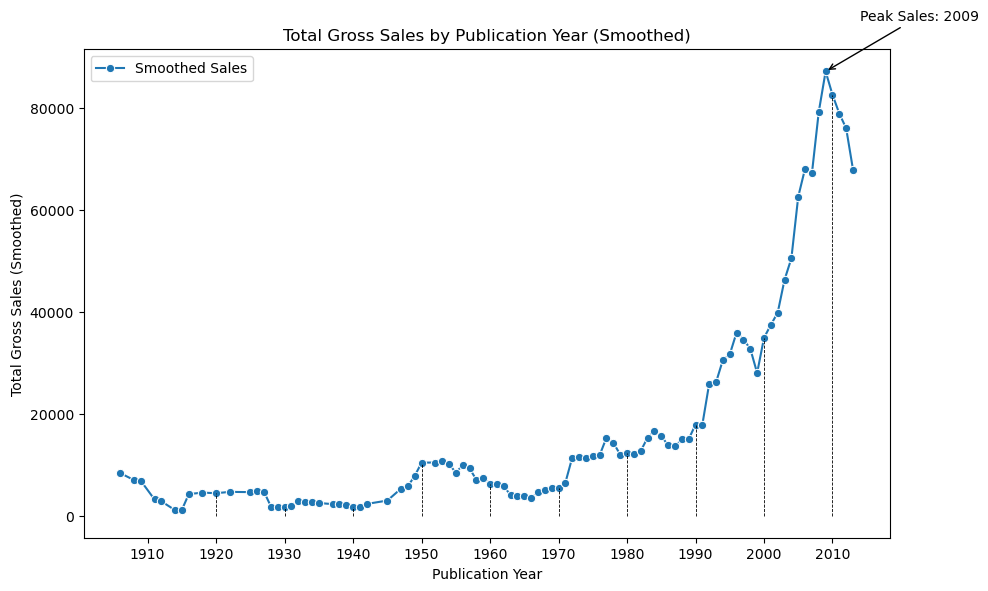

In [20]:
# Using booksales_data

# Filter out pub_year values under 1900 to reduce noise
filtered_booksales_data = booksales_data[booksales_data['pub_year'] >= 1900].copy() # Make sure this is a copy and not a view, as I'll be using it later

# Group by publication year and calculate total gross sales
yearly_sales = filtered_booksales_data.groupby('pub_year')['gross_sales'].sum().reset_index()

# Calculate a rolling average to smooth the line (7-year window for example)
yearly_sales['smoothed_sales'] = yearly_sales['gross_sales'].rolling(window=7, center=True).mean()

#After plotting this, I found a peak value I'd like to annotate:
max_sales_year = yearly_sales.loc[yearly_sales['smoothed_sales'].idxmax(), 'pub_year']
max_sales_value = yearly_sales['smoothed_sales'].max()

#Plotting the graph with smoothed line
plt.figure(figsize=(10,6))
sns.lineplot(x='pub_year', y='smoothed_sales', data=yearly_sales, marker='o', label='Smoothed Sales')

# Annotating the peak sales year
plt.annotate(f'Peak Sales: {int(max_sales_year)}', 
             xy=(max_sales_year, max_sales_value), 
             xytext=(max_sales_year + 5, max_sales_value + 10000),  # Adjusting annotation position
             arrowprops=dict(facecolor='black', arrowstyle='->'))


# Adding more x-axis ticks, every 10 years
tick_interval = 10
x_ticks = range(int(yearly_sales['pub_year'].min()) - 1, int(yearly_sales['pub_year'].max()), tick_interval)
plt.xticks(x_ticks)

# Adding vertical dashed lines only at the x-tick intervals
for year in x_ticks:
    if year in yearly_sales['pub_year'].values:
        smoothed_value = yearly_sales.loc[yearly_sales['pub_year'] == year, 'smoothed_sales'].values[0]
        if not pd.isna(smoothed_value):
            plt.plot([year, year], [0, smoothed_value], 'k--', linewidth=0.6)

#Add title and labels
plt.title('Total Gross Sales by Publication Year (Smoothed)')
plt.xlabel('Publication Year')
plt.ylabel('Total Gross Sales (Smoothed)')

#Plotting
plt.tight_layout()
plt.show()

We didn't have the best data available as we were missing Sales Dates. The only dates we have are publishing ones. However, while not the best, we can still find a trend on book buying behavior using this graph.

**2. Impact of book reviews on sales (Is there a relation between review scores/review count and sales?)**

- **Main Question:** How do review scores and review counts impact book sales?

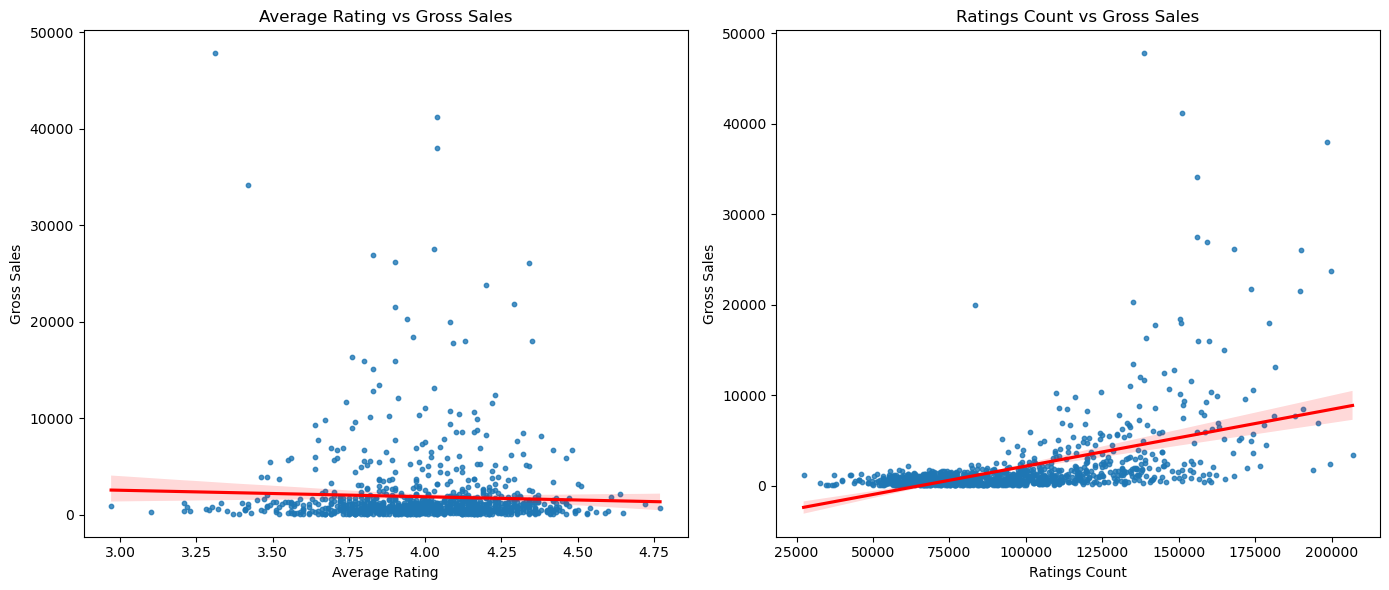

In [21]:
#Filter the data from booksales_data to remove rows where gross_sales, ratings_count, or average_rating are missing
filtered_booksales = booksales_data.dropna(subset=['gross_sales', 'ratings_count', 'average_rating'])

#Setting up the matplotlib figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Scatter Plot 1: Average rating vs Gross sales
sns.regplot(x='average_rating', y='gross_sales', data=filtered_booksales, ax=axes[0], scatter_kws={'s':10}, line_kws={"color":"red"})
axes[0].set_title('Average Rating vs Gross Sales')
axes[0].set_xlabel('Average Rating')
axes[0].set_ylabel('Gross Sales')

#Scatter Plot 2: Ratings count vs Gross sales
sns.regplot(x='ratings_count', y='gross_sales', data=filtered_booksales, ax=axes[1], scatter_kws={'s':10}, line_kws={"color":"red"})
axes[1].set_title('Ratings Count vs Gross Sales')
axes[1].set_xlabel('Ratings Count')
axes[1].set_ylabel('Gross Sales')


# Plotting
plt.tight_layout()
plt.show()

It looks like a book's average rating does not have a strong relationship with total sales. However, the number of ratings regardless of what the rating was, does seem to have a strong correlation with the number of sales.

Let's try to find if there's a specific threshold where book sales starts to climb.

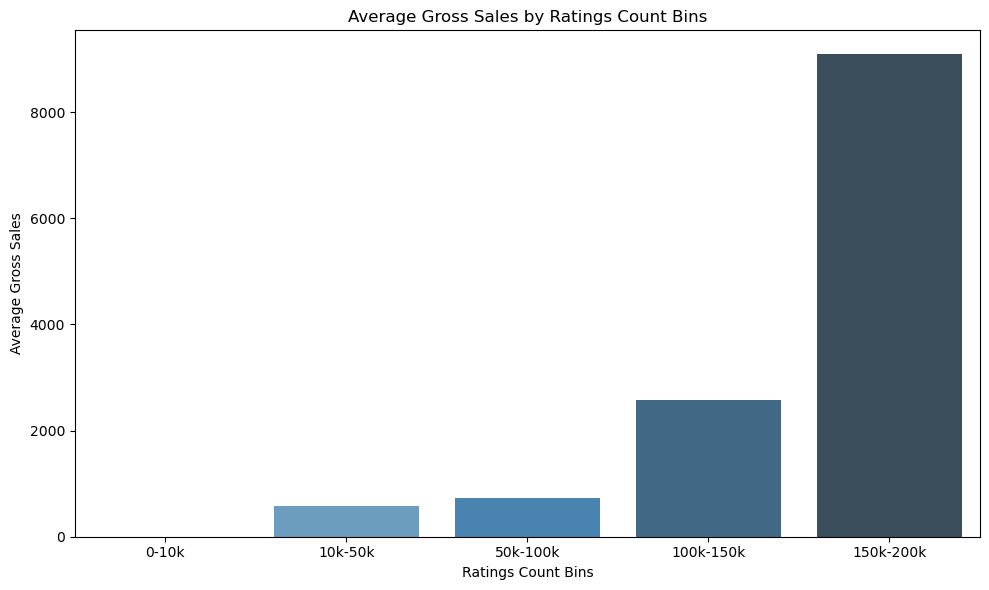

In [22]:
#Create categories for ratings_count
bins = [0, 10000, 50000, 100000, 150000, 200000]
labels = ['0-10k', '10k-50k', '50k-100k', '100k-150k', '150k-200k']
booksales_data['ratings_count_bins'] = pd.cut(booksales_data['ratings_count'], bins=bins, labels=labels)

#Group by bins and calculate average gross sales per bin
grouped_data = booksales_data.groupby('ratings_count_bins')['gross_sales'].mean().reset_index()

#Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='ratings_count_bins', y='gross_sales', data=grouped_data, palette='Blues_d')


plt.title('Average Gross Sales by Ratings Count Bins')
plt.xlabel('Ratings Count Bins')
plt.ylabel('Average Gross Sales')

plt.tight_layout()
plt.show()

It seems as if gross sales only start increasing in a significant way until a book has received over 100k reviews. And sales really shoot through the sky when the 150k mark is crossed. 

This pattern suggests that at first, review number does not play a big part on sales, but after crossing a certain threshold it can really make an impact on them.

**3. Characteristics of bestsellers (Do top books have common features?)**

- **Main Question:** What are the common characteristics (e.g., genre, length, reviews, etc.) of bestselling books?

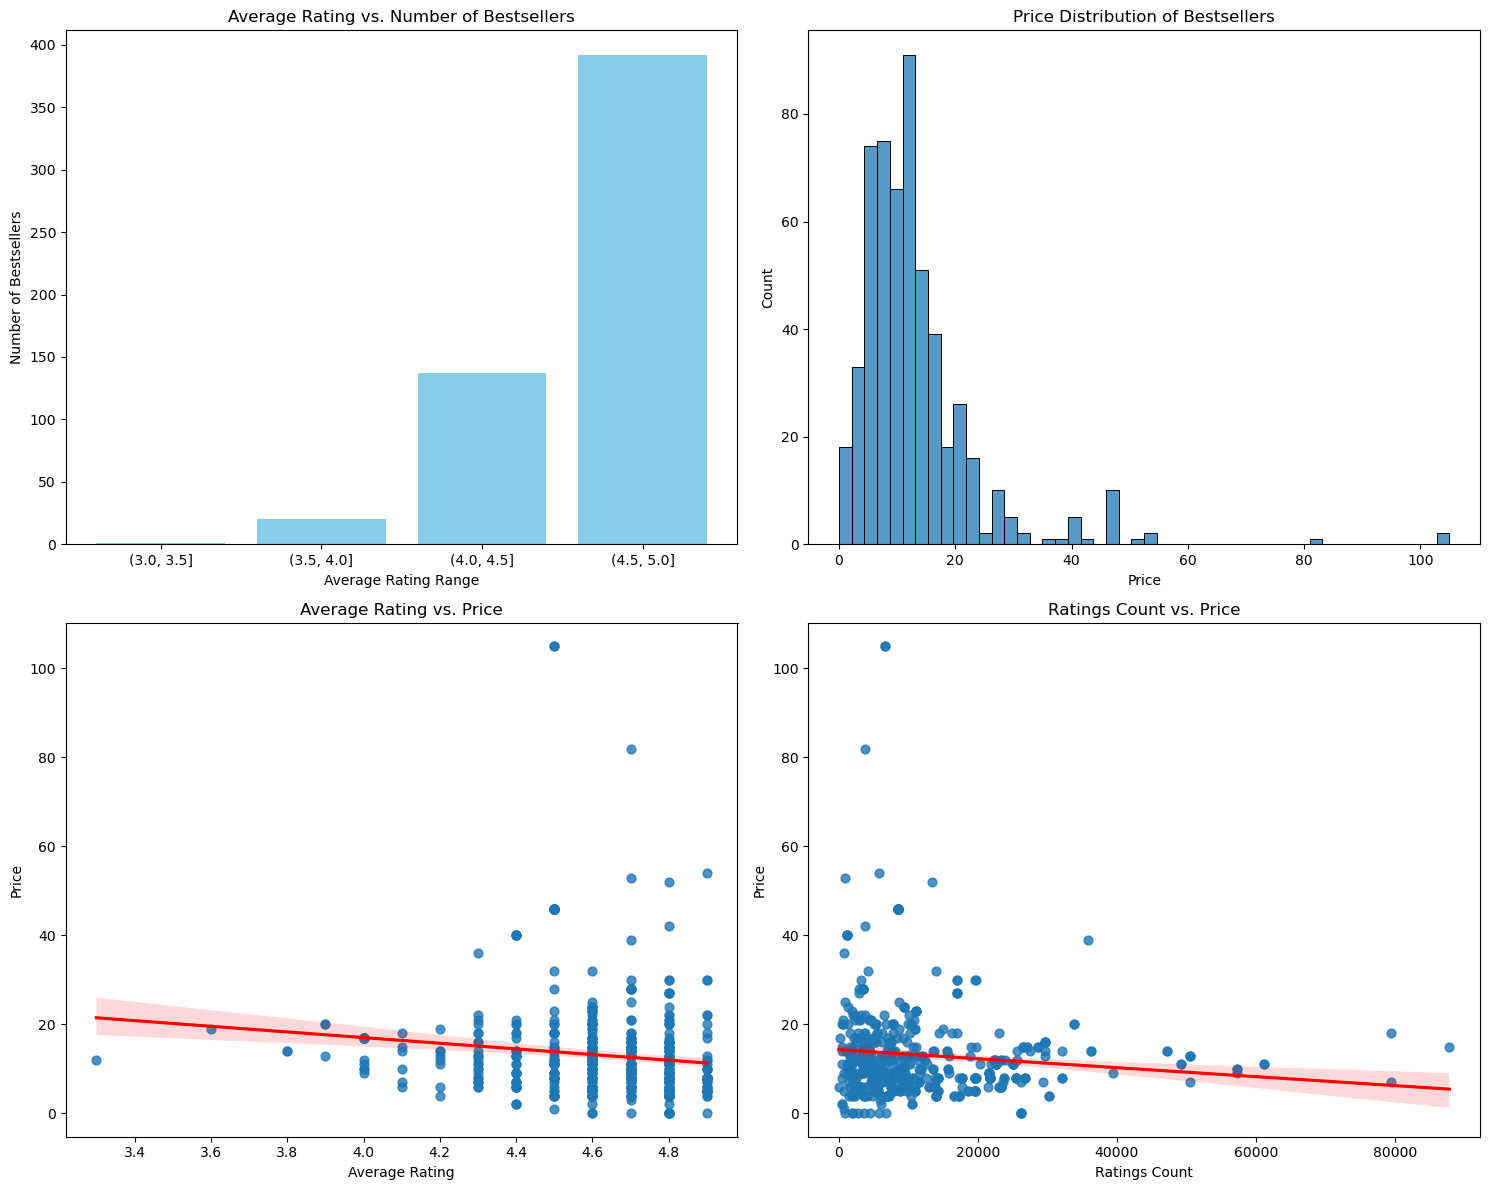

In [23]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Graph 1: Average Rating vs. Number of Bestsellers (Bar Chart)
bins = [3.0, 3.5, 4.0, 4.5, 5.0]
amazon_bestsellers_data['rating_bin'] = pd.cut(amazon_bestsellers_data['average_rating'], bins)
rating_counts = amazon_bestsellers_data['rating_bin'].value_counts(sort=False)

axes[0, 0].bar(rating_counts.index.astype(str), rating_counts.values, color='skyblue')
axes[0, 0].set_title('Average Rating vs. Number of Bestsellers')
axes[0, 0].set_xlabel('Average Rating Range')
axes[0, 0].set_ylabel('Number of Bestsellers')

# Graph 2: Price Distribution of Bestsellers (Histogram)
sns.histplot(data=amazon_bestsellers_data, x='price', ax=axes[0, 1])
axes[0, 1].set_title('Price Distribution of Bestsellers')
axes[0, 1].set_xlabel('Price')

# Graph 3: Average Rating vs. Price (Scatter Plot with Trend Line)
sns.regplot(data=amazon_bestsellers_data, x='average_rating', y='price', ax=axes[1, 0], scatter_kws={'s': 40}, line_kws={'color': 'red'})
axes[1, 0].set_title('Average Rating vs. Price')
axes[1, 0].set_xlabel('Average Rating')
axes[1, 0].set_ylabel('Price')

# Graph 4: Ratings Count vs. Price (Scatter Plot with Trend Line)
sns.regplot(data=amazon_bestsellers_data, x='ratings_count', y='price', ax=axes[1, 1], scatter_kws={'s': 40}, line_kws={'color': 'red'})
axes[1, 1].set_title('Ratings Count vs. Price')
axes[1, 1].set_xlabel('Ratings Count')
axes[1, 1].set_ylabel('Price')

# Plotting
plt.tight_layout()
plt.show()

We didn't had data that could have given us more insights available, such as book length or marketing budget. But we did find some useful data:
1. As expected, bestselling books tend to have a higher rating.
2. Seems like most top selling books are priced between \\$10 - \\$15 USD.
3. There is a slight negative correlation between both *price vs ratings count* as well as *price vs average rating.* This could suggest that bestsellers don't need to be priced high to be successfulâ€”especially if they have strong reviews.

**4. Trends in book genres over time (Is any genre gaining or losing popularity?)**

- **Main Question:** How has the popularity of different book genres changed over time?

In [24]:
# Try to find trends using genre and review count
filtered_booksales_data.genre.unique()


array(['genre fiction', 'fiction', 'nonfiction', 'children'], dtype=object)

In [25]:
#Replace 'genre fiction' with 'fiction'
filtered_booksales_data['genre'] = filtered_booksales_data['genre'].replace('genre fiction', 'fiction')
filtered_booksales_data.genre.unique()

array(['fiction', 'nonfiction', 'children'], dtype=object)

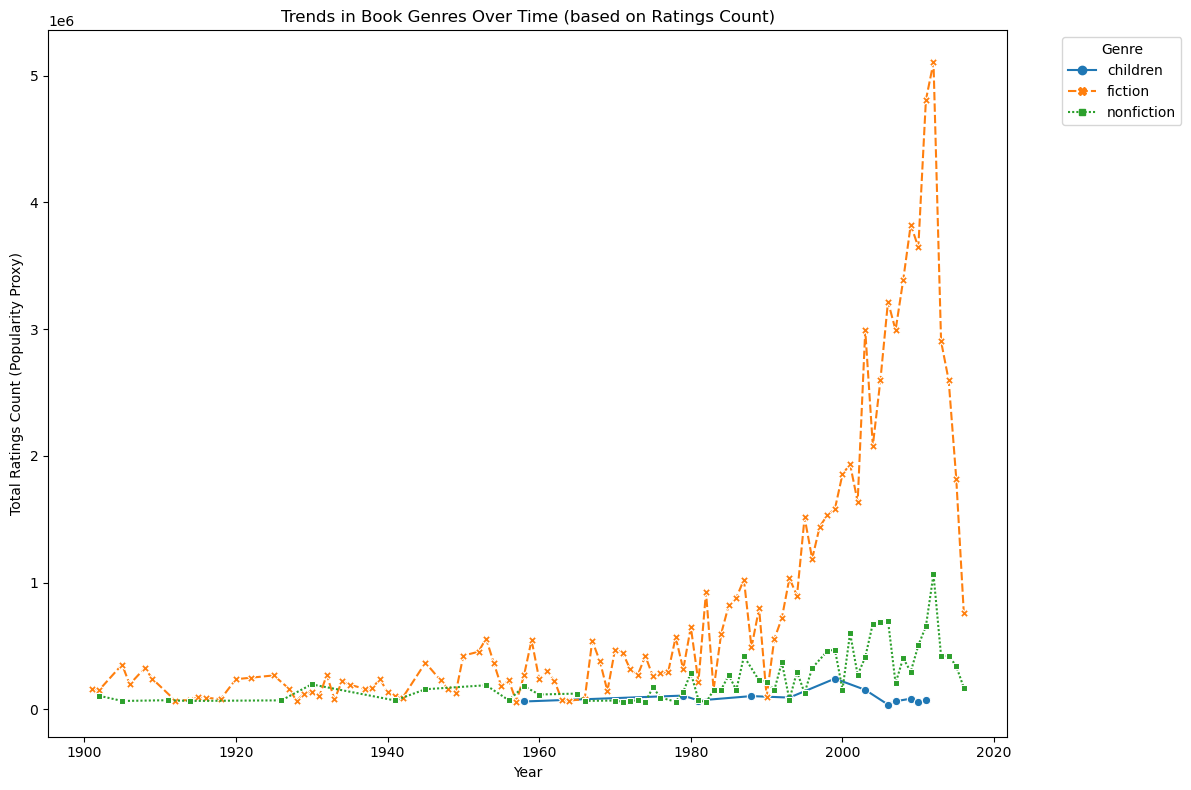

In [26]:
#Grouping by year and genre, summing the ratings_count
genre_trends = filtered_booksales_data.groupby(['pub_year', 'genre']).agg({'ratings_count': 'sum'}).reset_index() #using the data filtered by pub_year

# Now, we can pivot this data so that each genre becomes a column and years are the rows
genre_trends_pivot = genre_trends.pivot(index='pub_year', columns='genre', values='ratings_count')

#Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=genre_trends_pivot, markers=True)
plt.title('Trends in Book Genres Over Time (based on Ratings Count)')
plt.xlabel('Year')
plt.ylabel('Total Ratings Count (Popularity Proxy)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Once again, we do not have data for the dates on which the books where actually sold, which would have been great. And also, having more specific genres in our dataset would have provided better insight. 

Still, we can clearly see that Fiction is the most popular category.

It's also interesting to note how closely the Fiction and NonFiction trends align on their overall shape, despite the huge difference in their numbers.

Finally, we can clearly see Children books tend to be a lot less popular, nothing solid though, perhaps the cause is only that our dataset does not include enough Children books.

## Conclusion

Let's remember our goal with this project:
>Finding the factors that lead a book to success regarding sales.

Due to data limitations, certain critical insights such as precise sales dates and marketing budget were not available.
A publishing house, which could be interested on this kind of analysis should have access to that data and the analysis would follow this same structure. 

Despite that, this analysis still uncovered valuable trends and patterns, which I'll be listing below:

1. Total book sales started growing impressively quickly in the 90s, reaching their peak in 2009. They then began to drop, but can still be considered at all-time high levels.

2. It seems that a book's review rating does not have that much of an impact on total sales. The number of reviews, however, appears to be positively correlated. With a huge spike in book sales once a book has surpassed the 100K review count. This suggests that the quantity of engagement is more important, maybe due to "social proof".

3. While bestseller book prices include a wide range. The majority of them are priced within two key ranges: \\$5 - \\$8 and around \\$15 USD. Publishers should consider pricing their books within this ranges for maximum sales.

4. Price is not highly correlated with either Review Ratings nor Review Counts, meaning it does not play a big role when users rate books.

5. The most popular genre by far is Fiction. So aspiring authors that are not established yet and want to start a career should seriously consider writing Fiction instead of Non fiction if they are pondering both options.